In [1]:
import markcorr
import os
import shutil
import pandas as pd
import numpy as np
import altair as alt
from window import *
from pointPattern import *
import math
import pandas as pd
import numpy as np
from itertools import combinations
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
from breakpts import *
from sm_density import *
from window import *
from unnormdensity import *
from multiprocessing import Pool
from matplotlib.lines import Line2D
import scipy.stats as ss
import statsmodels.stats.multitest as multi
import altair_saver
from xgboost import XGBClassifier

ModuleNotFoundError: No module named 'xgboost'

In [ ]:
import betacells


In [ ]:
normal = pd.read_csv("../data/output/Normal.csv")
aml = pd.read_csv("../data/output/AML.csv")
imageSize_x = 1056
imageSize_y = 642
W = window((0, imageSize_x), (0, imageSize_y))
antibody_cell = {"Intensity_Adipocytes": "Adipocytes", "Intensity_CD163" : "Macrophages", "Intensity_CD20" : "B_cells", "Intensity_CD3" : "T_cells", 
                 "Intensity_CD31" : "Megakaryocytes", "Intensity_CD34" : "HSC", "Intensity_CD68" : "Monocytes", "Intensity_Erythroids" : "Erythroids",
                 "Intensity_Ki67" : "Ki67", "Intensity_MPO" : "Myeloids", "Intensity_NGFR" : "MSC", "Intensity__Adipocytes" : "Adipocytes", 
                 "Intensity__Bcells" : "B_cells", "Intensity__CD34" : "HSC", "Intensity__Erythroids" : "Erythroids", "Intensity__Ki67" : "Ki67", 
                 "Intensity__MSC" : "MSC", "Intensity__Macrophages" : "Macrophages", "Intensity__Megs" : "Megakaryocytes", "Intensity__Monocytes" : "Monocytes", 
                 "Intensity__Myeloid" : "Myeloids", "Intensity__Tcells" : "T_cells"}

FileNotFoundError: [Errno 2] No such file or directory: '../data/output/Normal.csv'

In [ ]:
#analysis based on cellType
normal = pd.read_csv("../data/output/Normal2.csv")
aml = pd.read_csv("../data/output/AML2.csv")
imageSize_x = 1056
imageSize_y = 642
W = window((0, imageSize_x), (0, imageSize_y))
antibody_cell = {"Intensity_Adipocytes": "Adipocytes", "Intensity_CD163" : "Macrophages", "Intensity_CD20" : "B_cells", "Intensity_CD3" : "T_cells", 
                 "Intensity_CD31" : "Megakaryocytes", "Intensity_CD34" : "HSC", "Intensity_CD68" : "Monocytes", "Intensity_Erythroids" : "Erythroids",
                 "Intensity_Ki67" : "Ki67", "Intensity_MPO" : "Myeloids", "Intensity_NGFR" : "MSC", "Intensity__Adipocytes" : "Adipocytes", 
                 "Intensity__Bcells" : "B_cells", "Intensity__CD34" : "HSC", "Intensity__Erythroids" : "Erythroids", "Intensity__Ki67" : "Ki67", 
                 "Intensity__MSC" : "MSC", "Intensity__Macrophages" : "Macrophages", "Intensity__Megs" : "Megakaryocytes", "Intensity__Monocytes" : "Monocytes", 
                 "Intensity__Myeloid" : "Myeloids", "Intensity__Tcells" : "T_cells", "r" : "r"}

In [ ]:
cell_to_marker = {"Adipocytes" : "Perilipin", "B_cells" : "CD20", "HSC" : "CD34", "Erythroids" : "ECAD", "Ki67" : "Ki67", "MSC" : "NGFR", 
                  "Macrophages" : "CD163", "Megakaryocytes" : "CD31", "Monocytes" : "CD68", "Myeloids" : "MPO", "T_cells" : "CD3"}

In [ ]:
AML_image, Normal_image = [], []
total_AML = aml["ImageNumber"].max()
total_Normal = normal["ImageNumber"].max()

normalMarks = normal.drop(["x", "y", "Area", "ImageNumber", "Unnamed: 0", "CellType"], axis = 1).columns
amlMarks = aml.drop(["x", "y", "Area", "ImageNumber", "Unnamed: 0", "CellType"], axis = 1).columns
for i in range (1, total_AML + 1):
    AML_image.append(aml.loc[aml["ImageNumber"] == i])
for i in range (1, total_Normal + 1):
    Normal_image.append(normal.loc[normal["ImageNumber"] == i])

# if os.path.exists("./result/"):
#     shutil.rmtree("./result/")
# os.mkdir("./result/")
# if os.path.exists("./result/AML/"):
#     shutil.rmtree("./result/AML/")
# os.mkdir("./result/AML/")
# if os.path.exists("./result/Normal/"):
#     shutil.rmtree("./result/Normal/")
# os.mkdir("./result/Normal/")



NameError: name 'aml' is not defined

In [ ]:
auc_aml = pd.DataFrame()
for i in range(len(AML_image)):  
    isoResult = pd.read_csv("./result1/AML/image_%d/iso.csv"%i).drop(["Unnamed: 0"], axis=1)
    isoMin = isoResult.where(isoResult > 0).min().min()
    logRes = np.log2(isoResult.where(isoResult > 0, isoMin))
    auc_aml["image_%d"%i] = logRes.sum()
aml_mean = auc_aml.mean(axis=1)

heatmap_x = []
heatmap_y = []
for i in range(len(aml_mean)):
    heatmap_x.append(cell_to_marker[antibody_cell[aml_mean.index[i].split(" vs. ")[0]]])
    heatmap_y.append(cell_to_marker[antibody_cell[aml_mean.index[i].split(" vs. ")[1]]])

auc = pd.DataFrame({"from" : heatmap_x, "to" : heatmap_y, "auc" : aml_mean})
p2 = alt.Chart(auc).mark_rect().encode(
    x=alt.X('from').sort(["Perilipin", "CD20", "CD34", "ECAD", "Ki67", "NGFR", "CD163", "CD31", "CD68", "MPO", "CD3"]),
    y=alt.Y('to').sort(["Perilipin", "CD20", "CD34", "ECAD", "Ki67", "NGFR", "CD163", "CD31", "CD68", "MPO", "CD3"]),
    color=alt.Color('auc', scale = alt.Scale(scheme='redblue', domainMid = 0, reverse=True, type="symlog"))
    
)
auc_normal = pd.DataFrame()
for i in range(len(Normal_image)):  
    isoResult = pd.read_csv("./result1/Normal/image_%d/iso.csv"%i).drop(["Unnamed: 0"], axis=1)
    isoMin = isoResult.where(isoResult > 0).min().min()
    logRes = np.log2(isoResult.where(isoResult > 0, isoMin))
    auc_normal["image_%d"%i] = logRes.sum()

normal_mean = auc_normal.mean(axis=1)


heatMapData = pd.DataFrame({"from" : heatmap_x, "to" : heatmap_y, "auc" : normal_mean})
heatmapNormal = alt.Chart(heatMapData).mark_rect().encode(
    x=alt.X('from').sort(["Perilipin", "CD20", "CD34", "ECAD", "Ki67", "NGFR", "CD163", "CD31", "CD68", "MPO", "CD3"]),
    y=alt.Y('to').sort(["Perilipin", "CD20", "CD34", "ECAD", "Ki67", "NGFR", "CD163", "CD31", "CD68", "MPO", "CD3"]),
    color=alt.Color('auc', scale = alt.Scale(scheme='redblue', domainMid = 0, reverse=True, type="symlog"))
    
)
heatmapNormal | p2

NameError: name 'AML_image' is not defined

In [ ]:
str(cell_to_marker.values()).replace("\'", "\"")

'dict_values(["Perilipin", "CD20", "CD34", "ECAD", "Ki67", "NGFR", "CD163", "CD31", "CD68", "MPO", "CD3"])'

In [ ]:
#heatmap with marker intensity
auc_aml_r = pd.DataFrame()
for i in range(36):  
    isoResult = pd.read_csv("./result2/AML/image_%d/iso.csv"%i).drop(["Unnamed: 0"], axis=1)
    isoMin = isoResult.where(isoResult > 0).min().min()
    logRes = np.log2(isoResult.where(isoResult > 0, isoMin))
    auc_aml_r["image_%d"%i] = logRes.sum()
auc_aml_r = auc_aml_r[auc_aml_r != 0]
aml_mean_r = auc_aml_r.mean(axis=1)

heatmap_x = []
heatmap_y = []
for i in range(len(aml_mean_r)):
    heatmap_x.append(cell_to_marker[antibody_cell[aml_mean_r.index[i].split(" vs. ")[0]]])
    heatmap_y.append(cell_to_marker[antibody_cell[aml_mean_r.index[i].split(" vs. ")[1]]])

heatmap_aml_intensity = pd.DataFrame({"from": heatmap_x, "to" : heatmap_y, "auc" : aml_mean_r})
    
heatmap_aml = alt.Chart(heatmap_aml_intensity, title = "AML").mark_rect().encode(
    x=alt.X('from').sort(["Perilipin", "CD20", "CD34", "ECAD", "Ki67", "NGFR", "CD163", "CD31", "CD68", "MPO", "CD3"]),
    y=alt.Y('to').sort(["Perilipin", "CD20", "CD34", "ECAD", "Ki67", "NGFR", "CD163", "CD31", "CD68", "MPO", "CD3"]),
    color=alt.Color('auc', scale = alt.Scale(scheme='redblue', domainMid = 0, reverse=True, type = "symlog"))   
)

auc_normal_r = pd.DataFrame()
for i in range(15):  
    isoResult = pd.read_csv("./result2/Normal/image_%d/iso.csv"%i).drop(["Unnamed: 0"], axis=1)
    isoMin = isoResult.where(isoResult > 0).min().min()
    logRes = np.log2(isoResult.where(isoResult > 0, isoMin))
    auc_normal_r["image_%d"%i] = logRes.sum(axis = 0)
auc_normal_r = auc_normal_r[auc_normal_r != 0]
normal_mean_r = auc_normal_r.mean(axis=1)
heatmap_x = []
heatmap_y = []
for i in range(len(aml_mean_r)):
    heatmap_x.append(cell_to_marker[antibody_cell[normal_mean_r.index[i].split(" vs. ")[0]]])
    heatmap_y.append(cell_to_marker[antibody_cell[normal_mean_r.index[i].split(" vs. ")[1]]])
    
heatmap_normal_intensity = pd.DataFrame({"from" : heatmap_x, "to" : heatmap_y, "auc" : normal_mean_r})
heatmap_normal = alt.Chart(heatmap_normal_intensity, title = "NBM").mark_rect().encode(
    x=alt.X('from').sort(["Perilipin", "CD20", "CD34", "ECAD", "Ki67", "NGFR", "CD163", "CD31", "CD68", "MPO", "CD3"]),
    y=alt.Y('to').sort(["Perilipin", "CD20", "CD34", "ECAD", "Ki67", "NGFR", "CD163", "CD31", "CD68", "MPO", "CD3"]),
    color=alt.Color('auc', scale = alt.Scale(scheme='redblue', domainMid = 0, reverse=True, type = "symlog"))
    
)
sideByside_intensity = alt.hconcat(heatmap_normal, heatmap_aml, spacing = 100).properties(title = "Antibody Intensity")

NameError: name 'cell_to_marker' is not defined

In [ ]:
#Heatmap with Cell Type
auc_aml_r = pd.DataFrame()
for i in range(36):  
    isoResult = pd.read_csv("./result3/AML/image_%d/iso.csv"%i).drop(["Unnamed: 0"], axis=1)
    isoMin = isoResult.where(isoResult > 0).min().min()
    logRes = np.log2(isoResult.where(isoResult > 0, isoMin))
    auc_aml_r["image_%d"%i] = logRes.sum()
auc_aml_r = auc_aml_r[auc_aml_r != 0]
aml_mean_r = auc_aml_r.mean(axis=1)

heatmap_x = []
heatmap_y = []
for i in range(len(aml_mean_r)):
    heatmap_x.append(antibody_cell[aml_mean_r.index[i].split(" vs. ")[0]])
    heatmap_y.append(antibody_cell[aml_mean_r.index[i].split(" vs. ")[1]])

heatmap_aml_intensity = pd.DataFrame({"from": heatmap_x, "to" : heatmap_y, "auc" : aml_mean_r})
    
heatmap_aml = alt.Chart(heatmap_aml_intensity, title = "AML").mark_rect().encode(
    x=alt.X('from').sort(["Adipocytes", "B_cells", "HSC", "Erythroids", "Ki67", "MSC", "Macrophages", "Megakaryocytes", "Monocytes", "Myeloids", "T_cells"]),
    y=alt.Y('to').sort(["Adipocytes", "B_cells", "HSC", "Erythroids", "Ki67", "MSC", "Macrophages", "Megakaryocytes", "Monocytes", "Myeloids", "T_cells"]),
    color=alt.Color('auc', scale = alt.Scale(scheme='redblue', domainMid = 0, reverse=True, type = "symlog"))   
)

auc_normal_r = pd.DataFrame()
for i in range(15):  
    isoResult = pd.read_csv("./result3/Normal/image_%d/iso.csv"%i).drop(["Unnamed: 0"], axis=1)
    isoMin = isoResult.where(isoResult > 0).min().min()
    logRes = np.log2(isoResult.where(isoResult > 0, isoMin))
    auc_normal_r["image_%d"%i] = logRes.sum(axis = 0)
auc_normal_r = auc_normal_r[auc_normal_r != 0]
normal_mean_r = auc_normal_r.mean(axis=1)
heatmap_x = []
heatmap_y = []
for i in range(len(aml_mean_r)):
    heatmap_x.append(antibody_cell[normal_mean_r.index[i].split(" vs. ")[0]])
    heatmap_y.append(antibody_cell[normal_mean_r.index[i].split(" vs. ")[1]])
    
heatmap_normal_cellType = pd.DataFrame({"from" : heatmap_x, "to" : heatmap_y, "auc" : normal_mean_r})
heatmap_nbm = alt.Chart(heatmap_normal_cellType, title = "NBM").mark_rect().encode(
    x=alt.X('from').sort(["Adipocytes", "B_cells", "HSC", "Erythroids", "Ki67", "MSC", "Macrophages", "Megakaryocytes", "Monocytes", "Myeloids", "T_cells"]),
    y=alt.Y('to').sort(["Adipocytes", "B_cells", "HSC", "Erythroids", "Ki67", "MSC", "Macrophages", "Megakaryocytes", "Monocytes", "Myeloids", "T_cells"]),
    color=alt.Color('auc', scale = alt.Scale(scheme='redblue', domainMid = 0, reverse=True, type = "symlog"))
    
)
sideByside_cellType = alt.hconcat(heatmap_nbm, heatmap_aml, spacing = 65).properties(title = "Cell Type")
alt.vconcat(sideByside_cellType, sideByside_intensity)

alt.VConcatChart(...)

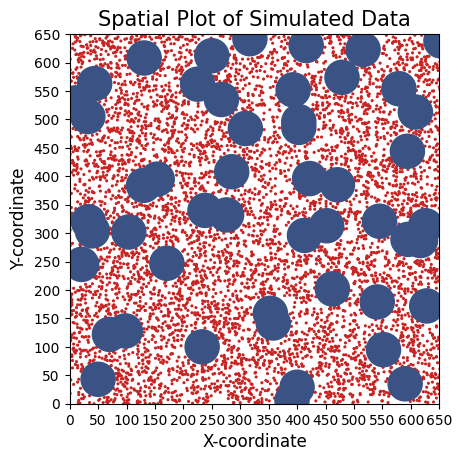

5694
5694


In [8]:
import random
random.seed(20)
xrange = [0,660]
yrange = [0,660]
W = window(xrange,yrange)
x = []
y = []
for i in range(0,8000):
    n = random.randint(0, 660)
    x.append(n)
    n = random.randint(0, 660)
    y.append(n)
mark1 = []
mark2 = []
for i in range(8000):
    n = random.randint(1,10)
    mark1.append(n)
mark3 = []
d = [3]*len(x)
adipocyte_x = []
adipocyte_y = []
mark3 =[]
for i in range(0,50):
    n = random.randint(0, 660)
    adipocyte_x.append(n)
    n = random.randint(0, 660)
    adipocyte_y.append(n)
    mark3.append(random.randint(0, 10))
rm_idx = []
for i in range(len(x)):
    for j in range(len(adipocyte_x)):
        d2_0 = (x[i]-adipocyte_x[j])**2 + (y[i]-adipocyte_y[j])**2
        if d2_0 < 961:
            rm_idx.append(i)
x = np.delete(x,rm_idx).tolist()
y = np.delete(y,rm_idx).tolist()
mark1 = np.delete(mark1,rm_idx).tolist()
d = np.delete(d,rm_idx).tolist()

p_adipo = pointPattern(adipocyte_x,adipocyte_y,[60]*len(adipocyte_x),W,mark3)
n=len(x)
fig, ax = plt.subplots()
plt.xticks(range(0, 660, 50))   
plt.yticks(range(0, 660, 50))
plt.axis('square')
for i in range(n):
    x_p = x[i]
    y_p = y[i]
    d_p = d[i]
    c=plt.Circle((x_p, y_p), d_p/2, color="#c82423")
    ax.add_artist(c)
for i in range(len(adipocyte_x)):
    x_p = adipocyte_x[i]
    y_p = adipocyte_y[i]
    c=plt.Circle((x_p, y_p), 30, color="#3B5284")
    ax.add_artist(c)
plt.title("Spatial Plot of Simulated Data", fontsize=15)
plt.xlabel("X-coordinate", fontsize=12)
plt.ylabel("Y-coordinate", fontsize=12)
plt.show()
# mark = pd.DataFrame()
# mark["smallcell"] = mark1
# d = None
mark_1 = mark1+[0]*len(mark3)
mark_2 = [0]*len(mark1)+mark3

mark = pd.DataFrame()
mark["smallcell"] = mark_1
mark["largecell"] = mark_2
x = x+adipocyte_x
y = y+adipocyte_y
d = d+[60]*len(adipocyte_x)
print(len(mark_1))
print(len(x))
n=len(x)
p = pointPattern(x,y,d,W,mark)
r, funs = markcorr.markcorr(p, saveImage=True, savefolder="./testResult/general_large/", remove_zeros=False)

iso, trans = {}, {}
for i in funs:
    trans[i] = (funs[i][0])
    iso[i] = (funs[i][1])
iso = pd.DataFrame(iso)
trans = pd.DataFrame(trans)

iso.to_csv("./testResult/general_large/iso.csv")
# p = pointPattern(x,y,d,W,mark)
# r,funs = markcorr.markcorr(p,pp=p_adipo, saveImage=True, savefolder="./testResult/general/", remove_zeros=False)
# iso, trans = {}, {}
# for i in funs:
#     trans[i] = (funs[i][0])
#     iso[i] = (funs[i][1])
# iso = pd.DataFrame(iso)
# trans = pd.DataFrame(trans)

# iso.to_csv("./testResult/general/iso.csv")
# trans.to_csv("./testResult/general/trans.csv")

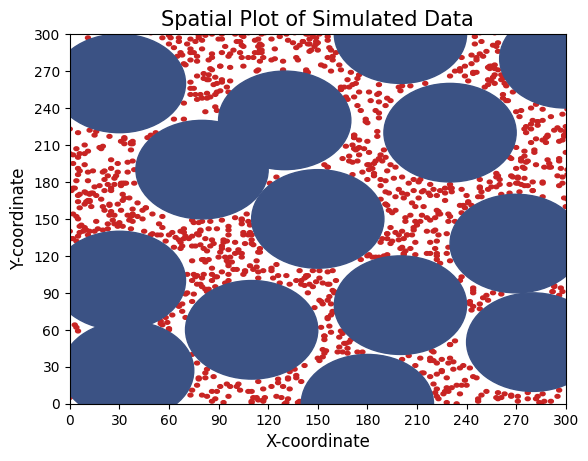

(2912, 3)
2912


In [20]:
import random
random.seed(12)
xrange = [0,330]
yrange = [0,330]
W = window(xrange,yrange)
x = []
y = []
for i in range(0,4000):
    n = random.randint(0, 330)
    x.append(n)
    n = random.randint(0, 330)
    y.append(n)
mark1 = []
mark3 = []
for i in range(0,len(x)):
    n = random.randint(1,5)
    mark1.append(1)
    mark3.append(3)
mark2 = []
d = [3]*len(x)
adipocyte_x = [35,110,30,150,200,230,280,80,30,200,300,130,270,180]
adipocyte_y = [27,60,100,150,300,220,50,190,260,80,280,230,130,0]
rm_idx = []
for i in range(len(x)):
    for j in range(len(adipocyte_x)):
        d2_0 = (x[i]-adipocyte_x[j])**2 + (y[i]-adipocyte_y[j])**2
        if d2_0 < 1681:
            rm_idx.append(i)
x = np.delete(x,rm_idx).tolist()
y = np.delete(y,rm_idx).tolist()
mark1 = np.delete(mark1,rm_idx).tolist()
mark3 = np.delete(mark3,rm_idx).tolist()
d = np.delete(d,rm_idx).tolist()

fig, ax = plt.subplots()
plt.xticks(range(0, 330, 30))   
plt.yticks(range(0, 330, 30))
for i in range(len(x)):
    x_p = x[i]
    y_p = y[i]
    d_p = d[i]
    c=plt.Circle((x_p, y_p), d_p/2, color="#c82423")
    ax.add_artist(c)
for i in range(len(adipocyte_x)):
    x_p = adipocyte_x[i]
    y_p = adipocyte_y[i]
    c=plt.Circle((x_p, y_p), 40, color="#3B5284")
    ax.add_artist(c)
plt.title("Spatial Plot of Simulated Data", fontsize=15)
plt.xlabel("X-coordinate", fontsize=12)
plt.ylabel("Y-coordinate", fontsize=12)
plt.show()


for i in range(len(adipocyte_x)):
    n = random.randint(1,5)
    mark2.append(2)
mark_1 = mark1+[0]*len(mark2)+[0]*len(mark3)
mark_2 = [0]*len(mark1)+mark2+[0]*len(mark3)
mark_3 = [0]*len(mark1)+[0]*len(mark2)+mark3
mark = pd.DataFrame()
mark["smallcell1"] = mark_1
mark["largecell"] = mark_2
mark["smallcell2"] = mark_3
print(mark.shape)
x = x+adipocyte_x+x
y = y+adipocyte_y+y
print(len(x))
# mark1 = pd.DataFrame(np.array([mark1]).transpose(),columns=["small cell1"])
# mark2 = pd.DataFrame(np.array([mark2]).transpose(),columns=["large cell"])
# mark3 = pd.DataFrame(np.array([mark3]).transpose(),columns=["small cell2"])
p_adipo = pointPattern(adipocyte_x,adipocyte_y,[80]*len(adipocyte_x),W,mark2)
# n=len(x)
d=None
p = pointPattern(x,y,d,W,mark)
r, funs = markcorr.markcorr(p, saveImage=True, savefolder="./testResult/general_large_mark3/", remove_zeros=False)

iso, trans = {}, {}
for i in funs:
    trans[i] = (funs[i][0])
    iso[i] = (funs[i][1])
iso = pd.DataFrame(iso)
trans = pd.DataFrame(trans)

iso.to_csv("./testResult/general_large_mark3/iso.csv")

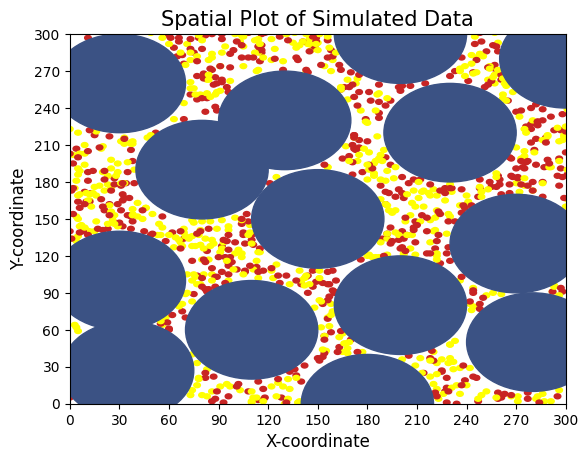

In [11]:
import random
import numpy as np
random.seed(12)
xrange = [0,330]
yrange = [0,330]
x1 = []
y1 = []
x2 = []
y2 = []
for i in range(0,2000):
    n = random.randint(0, 330)
    x1.append(n)
    n = random.randint(0, 330)
    y1.append(n)
    n = random.randint(0, 330)
    x2.append(n)
    n = random.randint(0, 330)
    y2.append(n)
adipocyte_x = [35,110,30,150,200,230,280,80,30,200,300,130,270,180]
adipocyte_y = [27,60,100,150,300,220,50,190,260,80,280,230,130,0]
rm_idx = []
for i in range(len(x1)):
    for j in range(len(adipocyte_x)):
        d2_0 = (x1[i]-adipocyte_x[j])**2 + (y1[i]-adipocyte_y[j])**2
        if d2_0 < 1681:
            rm_idx.append(i)
x1 = np.delete(x1,rm_idx).tolist()
y1 = np.delete(y1,rm_idx).tolist()
rm_idx = []
for i in range(len(x2)):
    for j in range(len(adipocyte_x)):
        d2_0 = (x2[i]-adipocyte_x[j])**2 + (y2[i]-adipocyte_y[j])**2
        if d2_0 < 1681:
            rm_idx.append(i)
x2 = np.delete(x2,rm_idx).tolist()
y2 = np.delete(y2,rm_idx).tolist()
fig, ax = plt.subplots()
plt.xticks(range(0, 330, 30))   
plt.yticks(range(0, 330, 30))
for i in range(len(x1)):
    x_p = x1[i]
    y_p = y1[i]
    c1=plt.Circle((x_p, y_p), 2, color="#c82423")
    ax.add_artist(c1)
    x_p = x2[i]
    y_p = y2[i]
    c2=plt.Circle((x_p, y_p), 2, color="yellow")
    ax.add_artist(c2)
for i in range(len(adipocyte_x)):
    x_p = adipocyte_x[i]
    y_p = adipocyte_y[i]
    c=plt.Circle((x_p, y_p), 40, color="#3B5284")
    ax.add_artist(c)
plt.title("Spatial Plot of Simulated Data", fontsize=15)
plt.xlabel("X-coordinate", fontsize=12)
plt.ylabel("Y-coordinate", fontsize=12)
plt.show()

In [12]:
x1

[319,
 172,
 69,
 87,
 311,
 244,
 15,
 158,
 171,
 140,
 255,
 237,
 96,
 143,
 321,
 23,
 327,
 177,
 208,
 159,
 249,
 114,
 143,
 225,
 164,
 157,
 115,
 16,
 27,
 159,
 11,
 255,
 201,
 116,
 44,
 248,
 248,
 136,
 276,
 175,
 300,
 169,
 315,
 83,
 140,
 108,
 315,
 156,
 77,
 160,
 282,
 157,
 74,
 279,
 329,
 208,
 32,
 257,
 280,
 291,
 128,
 318,
 48,
 212,
 29,
 312,
 137,
 191,
 323,
 112,
 86,
 36,
 87,
 15,
 230,
 322,
 151,
 13,
 189,
 60,
 311,
 159,
 172,
 105,
 11,
 286,
 70,
 172,
 6,
 124,
 67,
 93,
 252,
 114,
 83,
 89,
 126,
 320,
 319,
 15,
 316,
 244,
 324,
 114,
 49,
 88,
 318,
 191,
 249,
 187,
 228,
 163,
 326,
 116,
 311,
 199,
 314,
 261,
 306,
 191,
 311,
 270,
 165,
 151,
 116,
 239,
 228,
 329,
 231,
 322,
 309,
 251,
 298,
 330,
 263,
 293,
 92,
 25,
 153,
 88,
 244,
 83,
 209,
 324,
 166,
 274,
 149,
 16,
 110,
 144,
 11,
 156,
 75,
 261,
 147,
 67,
 317,
 34,
 170,
 92,
 317,
 153,
 237,
 288,
 55,
 106,
 259,
 324,
 287,
 321,
 73,
 99,
 24,
 105,
 1

In [24]:
import random
random.seed(12)
xrange = [0,330]
yrange = [0,330]
W = window(xrange,yrange)
x1 = []
y1 = []
x2 = []
y2 = []
for i in range(0,2000):
    n = random.randint(0, 330)
    x1.append(n)
    n = random.randint(0, 330)
    y1.append(n)
    n = random.randint(0, 330)
    x2.append(n)
    n = random.randint(0, 330)
    y2.append(n)
mark1 = []
mark2 = []
for i in range(0,len(x1)):
    n = random.randint(1,5)
    mark1.append(1)
    mark2.append(2)
mark3 = []
adipocyte_x = [35,110,30,150,200,230,280,80,30,200,300,130,270,180]
adipocyte_y = [27,60,100,150,300,220,50,190,260,80,280,230,130,0]
rm_idx = []
# for i in range(len(x1)):
#     for j in range(len(adipocyte_x)):
#         d2_0 = (x1[i]-adipocyte_x[j])**2 + (y1[i]-adipocyte_y[j])**2
#         if d2_0 < 1681:
#             rm_idx.append(i)
# x1 = np.delete(x1,rm_idx).tolist()
# y1 = np.delete(y1,rm_idx).tolist()
# mark1 = np.delete(mark1,rm_idx).tolist()
# rm_idx = []
# for i in range(len(x2)):
#     for j in range(len(adipocyte_x)):
#         d2_0 = (x2[i]-adipocyte_x[j])**2 + (y2[i]-adipocyte_y[j])**2
#         if d2_0 < 1681:
#             rm_idx.append(i)
# x2 = np.delete(x2,rm_idx).tolist()
# y2 = np.delete(y2,rm_idx).tolist()
# mark2 = np.delete(mark2,rm_idx).tolist()
# d = np.delete(d,rm_idx).tolist()


for i in range(len(adipocyte_x)):
    n = random.randint(1,5)
    mark3.append(2)
mark_1 = mark1+[0]*len(mark2)
mark_2 = [0]*len(mark1)+mark2
mark = pd.DataFrame()
mark["smallcell1"] = mark_1
mark["smallcell2"] = mark_2
print(mark.shape)
print(len(x1))
# x = x+adipocyte_x+x
# y = y+adipocyte_y+y
# p_adipo = pointPattern(adipocyte_x,adipocyte_y,[80]*len(adipocyte_x),W,mark2)
d=None
x=x1+x2
y=y1+y2
p = pointPattern(x,y,d,W,mark)
r, funs = markcorr.markcorr(p, saveImage=True, savefolder="./testResult/test_uniform/", remove_zeros=False)

iso, trans = {}, {}
for i in funs:
    trans[i] = (funs[i][0])
    iso[i] = (funs[i][1])
iso = pd.DataFrame(iso)
trans = pd.DataFrame(trans)

iso.to_csv("./testResult/test_uniform/iso.csv")

(4000, 2)
2000


In [5]:
import random
random.seed(12)
xrange = [0,330]
yrange = [0,330]
W = window(xrange,yrange)
x1 = []
y1 = []
x2 = []
y2 = []
for i in range(0,50):
    n = random.randint(0, 330)
    x1.append(n)
    n = random.randint(0, 330)
    y1.append(n)
    n = random.randint(0, 330)
    x2.append(n)
    n = random.randint(0, 330)
    y2.append(n)
mark1 = []
mark2 = []
for i in range(0,len(x1)):
    n = random.randint(1,5)
    mark1.append(1)
    mark2.append(2)
mark3 = []
adipocyte_x = [35,110,30,150,200,230,280,80,30,200,300,130,270,180]
adipocyte_y = [27,60,100,150,300,220,50,190,260,80,280,230,130,0]
rm_idx = []
for i in range(len(x1)):
    for j in range(len(adipocyte_x)):
        d2_0 = (x1[i]-adipocyte_x[j])**2 + (y1[i]-adipocyte_y[j])**2
        if d2_0 < 1681:
            rm_idx.append(i)
x1 = np.delete(x1,rm_idx).tolist()
y1 = np.delete(y1,rm_idx).tolist()
mark1 = np.delete(mark1,rm_idx).tolist()
rm_idx = []
for i in range(len(x2)):
    for j in range(len(adipocyte_x)):
        d2_0 = (x2[i]-adipocyte_x[j])**2 + (y2[i]-adipocyte_y[j])**2
        if d2_0 < 1681:
            rm_idx.append(i)
x2 = np.delete(x2,rm_idx).tolist()
y2 = np.delete(y2,rm_idx).tolist()
mark2 = np.delete(mark2,rm_idx).tolist()


for i in range(len(adipocyte_x)):
    n = random.randint(1,5)
    mark3.append(2)
mark_1 = mark1+[0]*len(mark2)+[0]*len(mark3)
mark_2 = [0]*len(mark1)+mark2+[0]*len(mark3)
mark_3 = [0]*len(mark1)+[0]*len(mark2)+mark3
mark = pd.DataFrame()
mark["smallcell1"] = mark_1
mark["smallcell2"] = mark_2
mark["largecell"] = mark_3
print(mark.shape)
print(len(x1))
d=None
x=x1+x2+adipocyte_x
y=y1+y2+adipocyte_y
p = pointPattern(x,y,d,W,mark)
r, funs = markcorr.markcorr(p, saveImage=True, savefolder="./testResult/test_uniform_large2/", remove_zeros=False)

iso, trans = {}, {}
for i in funs:
    trans[i] = (funs[i][0])
    iso[i] = (funs[i][1])
iso = pd.DataFrame(iso)
trans = pd.DataFrame(trans)

iso.to_csv("./testResult/test_uniform_large2/iso.csv")

(51, 3)
18


In [3]:
import random
random.seed(12)
xrange = [0,330]
yrange = [0,330]
W = window(xrange,yrange)
x1 = []
y1 = []
x2 = []
y2 = []
for i in range(0,50):
    n = random.randint(0, 330)
    x1.append(n)
    n = random.randint(0, 330)
    y1.append(n)
    n = random.randint(0, 330)
    x2.append(n)
    n = random.randint(0, 330)
    y2.append(n)
mark1 = []
mark2 = []
for i in range(0,len(x1)):
    n = random.randint(1,5)
    mark1.append(1)
    mark2.append(2)
mark3 = []
adipocyte_x = [35,110,30,150,200,230,280,80,30,200,300,130,270,180]
adipocyte_y = [27,60,100,150,300,220,50,190,260,80,280,230,130,0]
rm_idx = []
for i in range(len(x1)):
    for j in range(len(adipocyte_x)):
        d2_0 = (x1[i]-adipocyte_x[j])**2 + (y1[i]-adipocyte_y[j])**2
        if d2_0 < 1681:
            rm_idx.append(i)
x1 = np.delete(x1,rm_idx).tolist()
y1 = np.delete(y1,rm_idx).tolist()
mark1 = np.delete(mark1,rm_idx).tolist()
rm_idx = []
for i in range(len(x2)):
    for j in range(len(adipocyte_x)):
        d2_0 = (x2[i]-adipocyte_x[j])**2 + (y2[i]-adipocyte_y[j])**2
        if d2_0 < 1681:
            rm_idx.append(i)
x2 = np.delete(x2,rm_idx).tolist()
y2 = np.delete(y2,rm_idx).tolist()
mark2 = np.delete(mark2,rm_idx).tolist()


for i in range(len(adipocyte_x)):
    n = random.randint(1,5)
    mark3.append(2)
mark_1 = mark1+[0]*len(mark2)
mark_2 = [0]*len(mark1)+mark2
mark = pd.DataFrame()
mark["smallcell1"] = mark_1
mark["smallcell2"] = mark_2
print(mark.shape)
print(len(x1))
d=None
x=x1+x2
y=y1+y2
p = pointPattern(x,y,d,W,mark)
p_adipo = pointPattern(adipocyte_x,adipocyte_y,[80]*len(adipocyte_x),W,mark3)
r, funs = markcorr.markcorr(p, pp=p_adipo, saveImage=True, savefolder="./testResult/test_uniform_sizecorr2/", remove_zeros=False)

iso, trans = {}, {}
for i in funs:
    trans[i] = (funs[i][0])
    iso[i] = (funs[i][1])
iso = pd.DataFrame(iso)
trans = pd.DataFrame(trans)

iso.to_csv("./testResult/test_uniform_sizecorr2/iso.csv")

(37, 2)
18


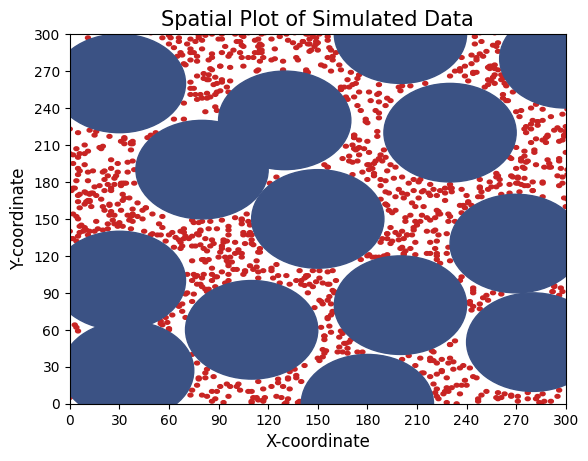

[2, 1, 3, 4, 3, 4, 2, 3, 1, 4, 4, 3, 4, 1, 1, 4, 5, 4, 5, 2, 4, 3, 2, 1, 4, 4, 3, 3, 5, 2, 2, 1, 5, 5, 4, 2, 4, 2, 5, 1, 4, 1, 3, 5, 2, 2, 2, 1, 3, 2, 4, 3, 5, 1, 1, 3, 1, 2, 2, 3, 2, 3, 4, 5, 1, 1, 4, 5, 2, 4, 2, 3, 1, 4, 2, 2, 1, 1, 3, 5, 3, 4, 1, 4, 1, 1, 2, 1, 1, 2, 3, 4, 3, 3, 3, 1, 2, 1, 2, 3, 3, 3, 5, 3, 5, 5, 3, 2, 4, 1, 2, 4, 4, 3, 4, 4, 3, 2, 3, 5, 4, 5, 2, 2, 3, 5, 2, 1, 5, 3, 5, 2, 3, 1, 1, 4, 2, 4, 1, 2, 4, 4, 1, 1, 5, 2, 2, 4, 2, 5, 4, 3, 5, 4, 3, 2, 4, 1, 2, 1, 1, 2, 2, 5, 5, 4, 4, 5, 2, 1, 5, 3, 4, 4, 2, 1, 2, 3, 5, 2, 5, 3, 5, 2, 1, 5, 1, 1, 2, 3, 3, 1, 1, 4, 2, 5, 3, 2, 1, 2, 2, 4, 2, 1, 4, 2, 5, 2, 2, 2, 5, 3, 4, 3, 2, 3, 2, 5, 3, 1, 3, 1, 1, 4, 2, 5, 3, 4, 5, 3, 1, 4, 5, 5, 4, 2, 4, 1, 1, 3, 5, 5, 1, 3, 1, 5, 5, 3, 2, 5, 5, 3, 4, 5, 4, 4, 5, 1, 1, 5, 2, 2, 4, 1, 3, 1, 3, 2, 1, 1, 5, 5, 5, 5, 3, 1, 2, 3, 1, 1, 5, 3, 2, 5, 2, 4, 1, 1, 5, 5, 4, 5, 2, 1, 2, 4, 3, 2, 5, 2, 5, 1, 2, 3, 1, 4, 2, 3, 2, 4, 5, 4, 1, 1, 5, 1, 4, 1, 1, 1, 3, 4, 5, 2, 1, 2, 3, 3, 2, 4, 4, 5, 5, 

/home/emmazhao/BME498/MarkcorrSpat/code/closepairs.py:311: RuntimeWarning: invalid value encountered in double_scalars
  d = np.linalg.norm(np.cross(p2-p1, p1-p3))/np.linalg.norm(p2-p1) # Distance between point and a line (from two points)
/home/emmazhao/BME498/MarkcorrSpat/code/closepairs.py:285: RuntimeWarning: invalid value encountered in double_scalars
  d = np.linalg.norm(np.cross(p2-p1, p1-p3))/np.linalg.norm(p2-p1) # Distance between point and a line (from two points)


In [7]:
import random
random.seed(12)
xrange = [0,330]
yrange = [0,330]
W = window(xrange,yrange)
x = []
y = []
for i in range(0,4000):
    n = random.randint(0, 330)
    x.append(n)
    n = random.randint(0, 330)
    y.append(n)
# for i in range(0,500):
#     n = random.randint(80, 250)
#     x.append(n)
#     n = random.randint(0, 100)
#     y.append(n)
mark1 = []
for i in range(0,len(x)):
    n = random.randint(1,5)
    mark1.append(n)
    # mark1.append(1)
mark2 = []
d = [3]*len(x)
adipocyte_x = [35,110,30,150,200,230,280,80,30,200,300,130,270,180]
adipocyte_y = [27,60,100,150,300,220,50,190,260,80,280,230,130,0]
rm_idx = []
for i in range(len(x)):
    for j in range(len(adipocyte_x)):
        d2_0 = (x[i]-adipocyte_x[j])**2 + (y[i]-adipocyte_y[j])**2
        if d2_0 < 1681:
            rm_idx.append(i)
x = np.delete(x,rm_idx).tolist()
y = np.delete(y,rm_idx).tolist()
mark1 = np.delete(mark1,rm_idx).tolist()
d = np.delete(d,rm_idx).tolist()

fig, ax = plt.subplots()
plt.xticks(range(0, 330, 30))   
plt.yticks(range(0, 330, 30))
for i in range(len(x)):
    x_p = x[i]
    y_p = y[i]
    d_p = d[i]
    c=plt.Circle((x_p, y_p), d_p/2, color="#c82423")
    ax.add_artist(c)
for i in range(len(adipocyte_x)):
    x_p = adipocyte_x[i]
    y_p = adipocyte_y[i]
    c=plt.Circle((x_p, y_p), 40, color="#3B5284")
    ax.add_artist(c)
plt.title("Spatial Plot of Simulated Data", fontsize=15)
plt.xlabel("X-coordinate", fontsize=12)
plt.ylabel("Y-coordinate", fontsize=12)
plt.show()


for i in range(len(adipocyte_x)):
    # mark2.extend(random.sample(range(1, 10),1))
    mark2.extend([1])
    
mark_1 = mark1+mark2

# x = x+adipocyte_x
# y = y+adipocyte_y
print(mark1)
# d.extend([60,60,60])
mark2 = pd.DataFrame(np.array([mark2]).transpose(),columns=["large cell"])
p_adipo = pointPattern(adipocyte_x,adipocyte_y,[80]*len(adipocyte_x),W,mark2)
mark = pd.DataFrame(np.array([mark1]).transpose(),columns=["small cell"])
d=None
p = pointPattern(x,y,d,W,mark)
r, funs = markcorr.markcorr(p, pp=p_adipo, saveImage=True, savefolder="./testResult/general_new/", remove_zeros=False)

iso, trans = {}, {}
for i in funs:
    trans[i] = (funs[i][0])
    iso[i] = (funs[i][1])
iso = pd.DataFrame(iso)
trans = pd.DataFrame(trans)

iso.to_csv("./testResult/general_new/iso.csv")

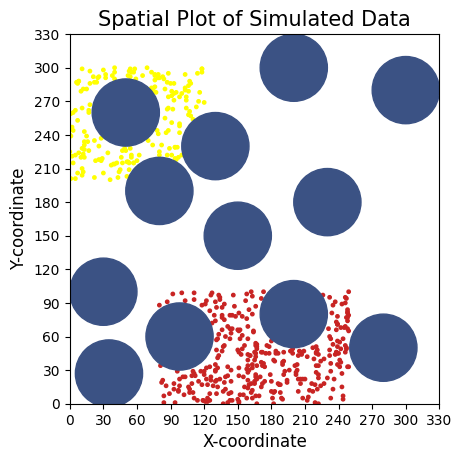

In [3]:
import random
import markcorr
random.seed(12)
xrange = [0,330]
yrange = [0,330]
W = window(xrange,yrange)
x = []
y = []
for i in range(0,500):
    n = random.randint(80, 250)
    x.append(n)
    n = random.randint(0, 100)
    y.append(n)
for i in range(0,300):
    n = random.randint(0, 120)
    x.append(n)
    n = random.randint(200, 300)
    y.append(n)
mark1 = []
mark2 = []
for i in range(500):
    n = random.randint(1,10)
    mark1.append(n)
for i in range(300):
    n = random.randint(1,10)
    mark2.append(n)
mark3 = []
d = [3]*len(x)
adipocyte_x = [35,98,30,150,200,230,280,80,50,200,300,130]
adipocyte_y = [27,60,100,150,300,180,50,190,260,80,280,230]
rm_idx = []
for i in range(len(x)):
    for j in range(len(adipocyte_x)):
        d2_0 = (x[i]-adipocyte_x[j])**2 + (y[i]-adipocyte_y[j])**2
        if d2_0 < 961:
            rm_idx.append(i)
x = np.delete(x,rm_idx).tolist()
y = np.delete(y,rm_idx).tolist()
mark1 = np.delete(mark1,np.where(np.array(rm_idx) <= 500)).tolist()
d = np.delete(d,rm_idx).tolist()
mark2 = np.delete(mark2, np.where(np.array(rm_idx) > 500)).tolist()

mark3.extend(random.sample(range(1, 10), 3))
p_adipo = pointPattern(adipocyte_x,adipocyte_y,[60]*len(adipocyte_x),W,mark3)
n=len(x)
fig, ax = plt.subplots()
plt.xticks(range(0, 360, 30))   
plt.yticks(range(0, 360, 30))
plt.axis('square')
for i in range(n):
    x_p = x[i]
    y_p = y[i]
    d_p = d[i]
    if y[i]>=0 and y[i]<=100:
        c=plt.Circle((x_p, y_p), d_p/2, color="#c82423")
    else:
        c=plt.Circle((x_p, y_p), d_p/2, color="yellow")
    ax.add_artist(c)
for i in range(len(adipocyte_x)):
    x_p = adipocyte_x[i]
    y_p = adipocyte_y[i]
    c=plt.Circle((x_p, y_p), 30, color="#3B5284")
    ax.add_artist(c)
plt.title("Spatial Plot of Simulated Data", fontsize=15)
plt.xlabel("X-coordinate", fontsize=12)
plt.ylabel("Y-coordinate", fontsize=12)
plt.show()
mark_1 = mark1+[0]*len(mark2)
mark_2 = [0]*len(mark1)+mark2

mark = pd.DataFrame()
mark["smallcell1"] = mark_1
mark["smallcell2"] = mark_2
# d = None
p = pointPattern(x,y,d,W,mark)
r,funs = markcorr.markcorr(p,pp=p_adipo, saveImage=True, savefolder="./testResult/diffTypes/", remove_zeros=False)
iso, trans = {}, {}
for i in funs:
    trans[i] = (funs[i][0])
    iso[i] = (funs[i][1])
iso = pd.DataFrame(iso)
trans = pd.DataFrame(trans)

iso.to_csv("./testResult/diffTypes/iso.csv")
trans.to_csv("./testResult/diffTypes/trans.csv")


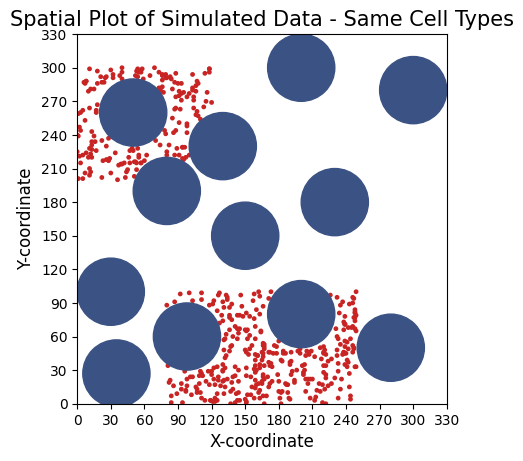

In [6]:
import random
import markcorr
random.seed(12)
xrange = [0,330]
yrange = [0,330]
W = window(xrange,yrange)
x = []
y = []
for i in range(0,500):
    n = random.randint(80, 250)
    x.append(n)
    n = random.randint(0, 100)
    y.append(n)
for i in range(0,300):
    n = random.randint(0, 120)
    x.append(n)
    n = random.randint(200, 300)
    y.append(n)
mark1 = []
for i in range(0,len(x)):
    n = random.randint(1,10)
    mark1.append(n)
mark2 = []
d = [3]*len(x)
adipocyte_x = [35,98,30,150,200,230,280,80,50,200,300,130]
adipocyte_y = [27,60,100,150,300,180,50,190,260,80,280,230]
rm_idx = []
for i in range(len(x)):
    for j in range(len(adipocyte_x)):
        d2_0 = (x[i]-adipocyte_x[j])**2 + (y[i]-adipocyte_y[j])**2
        if d2_0 < 961:
            rm_idx.append(i)
x = np.delete(x,rm_idx).tolist()
y = np.delete(y,rm_idx).tolist()
mark1 = np.delete(mark1,rm_idx).tolist()
d = np.delete(d,rm_idx).tolist()
mark2.extend(random.sample(range(1, 10), 3))
p_adipo = pointPattern(adipocyte_x,adipocyte_y,[60]*len(adipocyte_x),W,mark2)
n=len(x)
fig, ax = plt.subplots()
plt.xticks(range(0, 360, 30))   
plt.yticks(range(0, 360, 30))
plt.axis('square')
for i in range(n):
    x_p = x[i]
    y_p = y[i]
    d_p = d[i]
    c=plt.Circle((x_p, y_p), d_p/2, color="#c82423")
    ax.add_artist(c)
for i in range(len(adipocyte_x)):
    x_p = adipocyte_x[i]
    y_p = adipocyte_y[i]
    c=plt.Circle((x_p, y_p), 30, color="#3B5284")
    ax.add_artist(c)
plt.title("Spatial Plot of Simulated Data - Same Cell Types", fontsize=15)
plt.xlabel("X-coordinate", fontsize=12)
plt.ylabel("Y-coordinate", fontsize=12)
plt.savefig("./testResult/sameType.png")
plt.show()
mark = pd.DataFrame(np.array([mark1]).transpose(),columns=["small cell"])
d = None
p = pointPattern(x,y,d,W,mark)
r, funs = markcorr.markcorr(p,pp=p_adipo, saveImage=True, savefolder="./testResult/sameType/", remove_zeros=False)

iso, trans = {}, {}
for i in funs:
    trans[i] = (funs[i][0])
    iso[i] = (funs[i][1])
iso = pd.DataFrame(iso)
trans = pd.DataFrame(trans)

iso.to_csv("./testResult/sameType/iso.csv")
trans.to_csv("./testResult/sameType/trans.csv")

In [6]:
r = pd.read_csv("/home/emmazhao/BME498/MarkcorrSpat/code/testResult/diffTypes/r.csv")
line = pd.read_csv("/home/emmazhao/BME498/MarkcorrSpat/code/testResult/diffTypes/iso.csv")
line.rename(columns={"smallcell1 vs. smallcell1" : "kmm1", "smallcell1 vs. smallcell2" : "kmm2", "smallcell2 vs. smallcell1" : "kmm3", "smallcell2 vs. smallcell2" : "kmm4"}, inplace=True)
line = pd.concat([line, r], axis = 1)
line["ref"] = [1] *513
print(r)
kmm1 = alt.Chart(line, title="Small Cell 1 vs. Small Cell 1").mark_line().encode(
    x = alt.X("r", scale = alt.Scale(domain = [0, 300])),
    y = alt.Y("kmm1", title= "kmm", scale = alt.Scale(domain = [0.8, 1.8]))
)

ref = alt.Chart(line).mark_line(strokeDash = [8, 8], color = "red").encode(
    x = "r",
    y = "ref" 
)

p1 = (kmm1 + ref)

kmm2 = alt.Chart(line, title="Small Cell 1 vs. Small Cell 2").mark_line().encode(
    x = alt.X("r", scale = alt.Scale(domain = [0, 300])),
    y = alt.Y("kmm2", title= "kmm", scale = alt.Scale(domain = [0, 1.2]))
)

ref = alt.Chart(line).mark_line(strokeDash = [8, 8], color = "red").encode(
    x = "r",
    y = "ref" 
)

p2 = (kmm2 + ref)

kmm3 = alt.Chart(line, title="Small Cell 2 vs. Small Cell 1").mark_line().encode(
    x = alt.X("r", scale = alt.Scale(domain = [0, 300])),
    y = alt.Y("kmm3", title= "kmm", scale = alt.Scale(domain = [0, 1.2]))
)

ref = alt.Chart(line).mark_line(strokeDash = [8, 8], color = "red").encode(
    x = "r",
    y = "ref" 
)

p3 = (kmm3 + ref)
kmm4 = alt.Chart(line, title="Small Cell 2 vs. Small Cell 2").mark_line().encode(
    x = alt.X("r", scale = alt.Scale(domain = [0, 300])),
    y = alt.Y("kmm4", title= "kmm", scale = alt.Scale(domain = [0.8, 2.5]))
)
ref = alt.Chart(line).mark_line(strokeDash = [8, 8], color = "red").encode(
    x = "r",
    y = "ref" 
)

p4 = (kmm4 + ref)

alt.vconcat(p1 | p2, p3 | p4)

     Unnamed: 0           r
0             0   -0.644531
1             1    0.000000
2             2    0.644531
3             3    1.289062
4             4    1.933594
..          ...         ...
508         508  326.777344
509         509  327.421875
510         510  328.066406
511         511  328.710938
512         512  329.355469

[513 rows x 2 columns]


/home/emmazhao/anaconda3/envs/emma/lib/python3.10/site-packages/altair/utils/data.py:161: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  return {"values": data.to_dict(orient="records")}


alt.VConcatChart(...)

In [25]:

import altair as alt
iso = pd.read_csv("/home/emmazhao/BME498/MarkcorrSpat/code/testResult/sameType/iso.csv")
r = pd.read_csv("/home/emmazhao/BME498/MarkcorrSpat/code/testResult/sameType/r.csv")
iso = pd.concat([iso, r], axis = 1)
iso["ref"] = [1] *513
iso.rename(columns={'small cell vs. small cell': 'kmm'}, inplace=True)
kmm_plot = alt.Chart(iso, title="Kmm Plot of Simulated Data - Same Cell Types").mark_line().encode(
    x=alt.X("r", scale = alt.Scale(domain = [0, 85])),
    y=alt.Y("kmm", title= "kmm", scale = alt.Scale(domain = [0.9, 1.2]))
)

ref = alt.Chart(iso).mark_line(strokeDash = [8, 8], color = "red").encode(
    x = "r",
    y = "ref" 
)
kmm_plot+ref

/home/emmazhao/anaconda3/envs/emma/lib/python3.10/site-packages/altair/utils/data.py:161: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  return {"values": data.to_dict(orient="records")}


alt.LayerChart(...)

In [11]:

import altair as alt
iso = pd.read_csv("/home/emmazhao/BME498/MarkcorrSpat/code/testResult/general/iso.csv")
r = pd.read_csv("/home/emmazhao/BME498/MarkcorrSpat/code/testResult/general/r.csv")
iso = pd.concat([iso, r], axis = 1)
iso["ref"] = [1] *513
iso.rename(columns={'small cell vs. small cell': 'kmm'}, inplace=True)
kmm_plot = alt.Chart(iso, title="Kmm Plot of Simulated Data - General Case with Size Considered").mark_line().encode(
    x=alt.X("r", scale = alt.Scale(domain = [0, 85])),
    y=alt.Y("kmm", title= "kmm", scale = alt.Scale(domain = [0.96, 1.08]))
)

ref = alt.Chart(iso).mark_line(strokeDash = [8, 8], color = "red").encode(
    x = "r",
    y = "ref" 
)
kmm_plot+ref

/home/emmazhao/anaconda3/envs/emma/lib/python3.10/site-packages/altair/utils/data.py:161: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  return {"values": data.to_dict(orient="records")}


alt.LayerChart(...)

In [22]:
import altair as alt
iso = pd.read_csv("/home/emmazhao/BME498/MarkcorrSpat/code/testResult/betacells/iso.csv")
r = pd.read_csv("/home/emmazhao/BME498/MarkcorrSpat/code/testResult/betacells/r.csv")
iso = pd.concat([iso, r], axis = 1)
iso["ref"] = [1] *513
iso.rename(columns={"type_ off  vs. type_ off " : "kmm1", "type_ off  vs. type_ on " : "kmm2", "type_ on  vs. type_ off " : "kmm3", "type_ on  vs. type_ on " : "kmm4"}, inplace=True)
kmm1_plot = alt.Chart(iso, title="Betacells - Type off  vs. Type off").mark_line().encode(
    x=alt.X("r", scale = alt.Scale(domain = [0, 190])),
    y=alt.Y("kmm1", title= "kmm1", scale = alt.Scale(domain = [0, 2]))
)

ref = alt.Chart(iso).mark_line(strokeDash = [8, 8], color = "red").encode(
    x = "r",
    y = "ref" 
)
p1 = kmm1_plot+ref

kmm2_plot = alt.Chart(iso, title="Betacells - Type off  vs. Type on").mark_line().encode(
    x=alt.X("r", scale = alt.Scale(domain = [0, 190])),
    y=alt.Y("kmm2", title= "kmm2", scale = alt.Scale(domain = [0, 2]))
)

ref = alt.Chart(iso).mark_line(strokeDash = [8, 8], color = "red").encode(
    x = "r",
    y = "ref" 
)
p2 = kmm2_plot+ref

kmm3_plot = alt.Chart(iso, title="Betacells - Type on  vs. Type off").mark_line().encode(
    x=alt.X("r", scale = alt.Scale(domain = [0, 190])),
    y=alt.Y("kmm3", title= "kmm3", scale = alt.Scale(domain = [0, 2]))
)

ref = alt.Chart(iso).mark_line(strokeDash = [8, 8], color = "red").encode(
    x = "r",
    y = "ref" 
)
p3 = kmm1_plot+ref

kmm4_plot = alt.Chart(iso, title="Betacells - Type on  vs. Type on").mark_line().encode(
    x=alt.X("r", scale = alt.Scale(domain = [0, 190])),
    y=alt.Y("kmm4", title= "kmm4", scale = alt.Scale(domain = [0, 2]))
)

ref = alt.Chart(iso).mark_line(strokeDash = [8, 8], color = "red").encode(
    x = "r",
    y = "ref" 
)
p4 = kmm4_plot+ref

alt.vconcat(p1 | p2, p3 | p4)

/home/emmazhao/anaconda3/envs/emma/lib/python3.10/site-packages/altair/utils/data.py:161: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  return {"values": data.to_dict(orient="records")}


alt.VConcatChart(...)

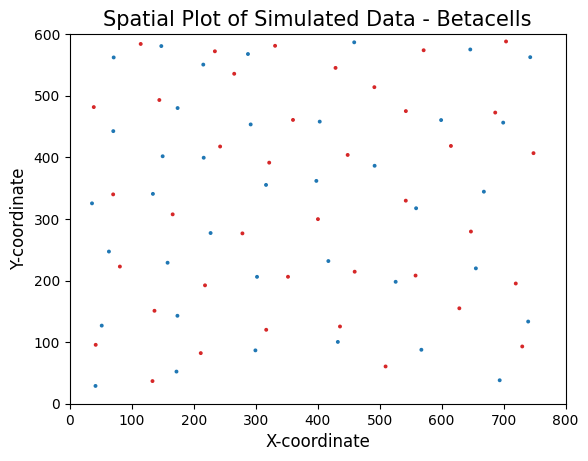

In [20]:
import betacells
colors = np.array(["tab:blue", "tab:red", "tab:purple", "tab:brown", "tab:pink", "tab:gray", "tab:olive", "tab:cyan", "k"])
x = betacells.x
y = betacells.y
fig, ax = plt.subplots()
plt.xticks(range(0, 900, 100))   
plt.yticks(range(0, 642, 100))

plt.title("Spatial Plot of Simulated Data - Betacells", fontsize=15)
plt.xlabel("X-coordinate", fontsize=12)
plt.ylabel("Y-coordinate", fontsize=12)
for j in range(len(x)):
    color = colors[0] if betacells.type[j] == ' on ' else colors[1]
    c=plt.Circle(xy = (x[j], y[j]), radius = 2, color = color)
    ax.add_artist(c)

plt.show()

In [18]:
cellTypes = [
             'Ki67', 
            #  'Myeloid', 
            #  'MSC', 
            #  'Monocytes', 
            #  'Macrophages', 
            #  'Bcells',
            #  'Megs', 
            #  'Tcel1ls', 
             'Adipocytes', 
            #  'Erythroids', 
            #  'CD34'
             ]
aml = False
i = 4

colors = np.array(["tab:blue", "tab:green", "tab:orange", "tab:red", "tab:purple", "tab:brown", "tab:pink", "tab:gray", "tab:olive", "tab:cyan", "k"])
image = AML_image[i][["x", "y", "CellType", "Area"]] if aml else Normal_image[i][["x", "y", "CellType", "Area"]]
allTypes = image["CellType"].unique()
if cellTypes != None:
    selectedTypes = np.in1d(image["CellType"], cellTypes)
    image = image.iloc[selectedTypes]

alt.Chart(image).mark_circle().encode(
    x = "x",
    y = "y",
    color= "CellType",
    size= "Area"
).properties(
    height = imageSize_y,
    width = imageSize_x
)

NameError: name 'Normal_image' is not defined

In [20]:
def plotPointPattern(i, aml = False, cellTypes = None):
    colors = np.array(["tab:blue", "tab:green", "tab:orange", "tab:red", "tab:purple", "tab:brown", "tab:pink", "tab:gray", "tab:olive", "tab:cyan", "k"])
    image = AML_image[i][["x", "y", "CellType", "Area"]] if aml else Normal_image[i][["x", "y", "CellType", "Area"]]
    allTypes = image["CellType"].unique()
    if cellTypes != None:
        selectedTypes = np.in1d(image["CellType"], cellTypes)
        image = image.iloc[selectedTypes]
    d = (np.sqrt(image["Area"] / 3.14) * 2).tolist()
    x = image["x"].tolist()
    y = image["y"].tolist()
   

    fig, ax = plt.subplots()
    plt.xticks(range(0, imageSize_x, 100))   
    plt.yticks(range(0, imageSize_y, 100))
    for j in range(len(x)):
        
        index = np.where(allTypes == image["CellType"].iloc[j])
        color = colors[index][0]
    
        c=plt.Circle(xy = (x[j], y[j]), radius = d[j]/2, color = color)
        ax.add_artist(c)
    
    plt.show()

    fig.savefig("pointPattern.png")
    fig, ax = plt.subplots()
    customeLines = []
    for j in range (len(allTypes)):
        customeLines.append(Line2D([0], [0], marker='o', color = colors[j], label=allTypes[j]))
    ax.legend(handles=customeLines, loc='center')
    plt.show()
cellTypes = [
             'Ki67', 
            #  'Myeloid', 
            #  'MSC', 
            #  'Monocytes', 
            #  'Macrophages', 
            #  'Bcells',
            #  'Megs', 
            #  'Tcel1ls', 
            #  'Adipocytes', 
            #  'Erythroids', 
            #  'CD34'
             ]

plotPointPattern(4, aml = False, cellTypes=cellTypes)

NameError: name 'Normal_image' is not defined

In [14]:
alt.data_transformers.disable_max_rows()
boxPlotData_Normal = pd.DataFrame()
auc_t_normal = np.transpose(auc_normal)
for i in  auc_t_normal.columns:
    temp = pd.DataFrame()
    temp["value"] = auc_t_normal[i]
    temp["objectType"] = [i] * 15
    temp['patient'] = ['normal'] * 15
    boxPlotData_Normal = pd.concat([boxPlotData_Normal, temp], ignore_index = True)

boxPlotData_AML = pd.DataFrame()
auc_t_aml = np.transpose(auc_aml)
for i in  auc_t_aml.columns:
    temp = pd.DataFrame()
    temp["value"] = auc_t_aml[i]
    temp["objectType"] = [i] * 36
    temp['patient'] = ['aml'] * 36
    boxPlotData_AML = pd.concat([boxPlotData_AML, temp], ignore_index = True)
boxPlotData_withoutR = pd.concat([boxPlotData_AML, boxPlotData_Normal], ignore_index=True)
boxplot_withoutR = alt.Chart(boxPlotData_withoutR).mark_boxplot().encode(
    x= "patient",
    y = "value"
).facet(
    'objectType',
    columns = len(normalMarks)
)
boxplot_withoutR.save("boxPlotData_withoutR.html")

In [15]:
alt.data_transformers.disable_max_rows()
boxPlotData_Normal_r = pd.DataFrame()
auc_t_normal = np.transpose(auc_normal_r)
for i in  auc_t_normal.columns:
    temp = pd.DataFrame()
    temp["value"] = auc_t_normal[i]
    temp["objectType"] = [i] * 15
    temp['patient'] = ['normal'] * 15
    boxPlotData_Normal_r = pd.concat([boxPlotData_Normal_r, temp], ignore_index = True)
boxPlotData_AML_r = pd.DataFrame()

auc_t_aml = np.transpose(auc_aml_r)
for i in  auc_t_aml.columns:
    temp = pd.DataFrame()
    temp["value"] = auc_t_aml[i]
    temp["objectType"] = [i] * 36
    temp['patient'] = ['aml'] * 36
    boxPlotData_AML_r = pd.concat([boxPlotData_AML_r, temp], ignore_index = True)
boxPlotData_withR = pd.concat([boxPlotData_AML_r, boxPlotData_Normal_r], ignore_index=True)
boxplot_withR = alt.Chart(boxPlotData_withR).mark_boxplot().encode(
    x= "patient",
    y = "value"
).facet(
    'objectType',
    columns = len(normalMarks)
)
boxplot_withR.save("boxPlotData_withR.html")

In [16]:
#performs mann-whitney u test
MWresult = {}
for col in auc_t_aml:
    Ustats, pValue = ss.mannwhitneyu(auc_t_aml[col].dropna(), auc_t_normal[col].dropna())
    MWresult[col] = (pValue)
    
MWchart = pd.DataFrame({"p" : MWresult})
heatmap_x = []
heatmap_y = []
for i in range(len(MWchart)):
    heatmap_x.append(antibody_cell[MWchart.index[i].split(" vs. ")[0]])
    heatmap_y.append(antibody_cell[MWchart.index[i].split(" vs. ")[1]])
MWchart["from"] = heatmap_x
MWchart["to"] = heatmap_y

#apply fdr correction with bh
MWchart["adjusted"] = multi.fdrcorrection(MWchart["p"])[1]
heatmapP = alt.Chart(MWchart).mark_rect().encode(
    x='from',
    y='to',
    color=alt.Color('adjusted', scale = alt.Scale(scheme='redblue', domainMid = 0.05, reverse=True))
    
).properties(
    height = 500, 
    width = 500
)
text = alt.Chart(MWchart).mark_text(baseline="middle").encode(
    text = alt.Text("adjusted", format=".2f"),
    x='from',
    y='to',
    color = alt.value("white")
)
(heatmapP + text)
        

alt.LayerChart(...)

In [17]:
aml_mean_r

Intensity__Adipocytes vs. Intensity__Adipocytes   -18683.683109
Intensity__Adipocytes vs. Intensity__Bcells        -4741.661413
Intensity__Adipocytes vs. Intensity__CD34          -7422.268930
Intensity__Adipocytes vs. Intensity__Erythroids     -860.170978
Intensity__Adipocytes vs. Intensity__Ki67            179.133728
                                                       ...     
Intensity__Tcells vs. Intensity__Macrophages          -5.240231
Intensity__Tcells vs. Intensity__Megs                 17.215801
Intensity__Tcells vs. Intensity__Monocytes           -21.817985
Intensity__Tcells vs. Intensity__Myeloid            -242.490906
Intensity__Tcells vs. Intensity__Tcells            -3273.573543
Length: 121, dtype: float64

In [18]:
diff_r = aml_mean_r - normal_mean_r
MWchart["diff_r"] = diff_r.to_numpy()
MWchart["GT0"] = (MWchart["diff_r"] > 0)
sig = MWchart.loc[MWchart["adjusted"] < 0.05]
cir = alt.Chart(MWchart).mark_point(size = 1200,
    filled = True).encode(
    x='from',
    y='to',
    color=alt.Color('diff_r', scale = alt.Scale(scheme='redblue', domainMid = 0, reverse=True, type="symlog")),
    shape = "GT0"
).properties(
    height = 500, 
    width = 500
)

text = alt.Chart(sig).mark_point(size = 500, filled = False, shape="triangle-up").encode(
    x='from',
    y='to',
    color = alt.value("black")
)

finalResult = alt.vconcat(sideByside_cellType, (cir + text))
finalResult

alt.VConcatChart(...)

In [19]:
diff = aml_mean - normal_mean
MWchart["diff"] = diff.to_numpy()
MWchart["GT0"] = (MWchart["diff"] > 0)
MWchart["sig"] = np.where(MWchart["adjusted"] < 0.05, "*", " ")
cir = alt.Chart(MWchart).mark_point(size = 1200,
    filled = True).encode(
    x='x',
    y='y',
    color=alt.Color('diff', scale = alt.Scale(scheme='redblue', domainMid = 0, reverse=True, type="symlog")),
    shape = "GT0"
).properties(
    height = 500, 
    width = 500
)

# text = alt.Chart(MWchart).mark_text(baseline="middle").encode(
#     text = alt.Text("sig"),
#     x='x',
#     y='y',
#     color = alt.value("black")
# )

# cir + text

In [20]:
#formatting dataset for decision tree
#feature format: r = xxx: a vs. b
r = pd.read_csv("r.csv", usecols=["r"])
x_data = {}
for i in range(len(r)):
    isoResult = pd.read_csv("./result3/AML/image_0/iso.csv").drop(["Unnamed: 0"], axis=1)
    for col in isoResult:
        name = "r=" + str(r["r"][i]) + ":" + str(col)
        x_data[name] = []

    for j in range(total_AML):
        isoResult = pd.read_csv("./result3/AML/image_%d/iso.csv"%j).drop(["Unnamed: 0"], axis=1)
        for col in isoResult:
            name = "r=" + str(r["r"][i]) + ":" + str(col)
            x_data[name].append(isoResult[col][i])

    for j in range (total_Normal):
        isoResult = pd.read_csv("./result3/Normal/image_%d/iso.csv"%j).drop(["Unnamed: 0"], axis=1)
        for col in isoResult:
            name = "r=" + str(r["r"][i]) + ":" + str(col)
            x_data[name].append(isoResult[col][i])
    
x_data = pd.DataFrame(x_data)
y_data = [1] * 36 + [0] * 15

In [21]:
X = x_data.values
y = np.array(y_data)


In [22]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [23]:
def cross_validation(model, _X, _y, _cv=3):
    _scoring = ['accuracy', 'precision', 'recall', 'f1']
    results = cross_validate(estimator=model,
                               X=_X,
                               y=_y,
                               cv=_cv,
                               scoring=_scoring,
                               return_train_score=True)
    return {"Training Accuracy scores": results['train_accuracy'],
              "Mean Training Accuracy": results['train_accuracy'].mean()*100,
              "Training Precision scores": results['train_precision'],
              "Mean Training Precision": results['train_precision'].mean(),
              "Training Recall scores": results['train_recall'],
              "Mean Training Recall": results['train_recall'].mean(),
              "Training F1 scores": results['train_f1'],
              "Mean Training F1 Score": results['train_f1'].mean(),
              "Validation Accuracy scores": results['test_accuracy'],
              "Mean Validation Accuracy": results['test_accuracy'].mean()*100,
              "Validation Precision scores": results['test_precision'],
              "Mean Validation Precision": results['test_precision'].mean(),
              "Validation Recall scores": results['test_recall'],
              "Mean Validation Recall": results['test_recall'].mean(),
              "Validation F1 scores": results['test_f1'],
              "Mean Validation F1 Score": results['test_f1'].mean()
              }

In [24]:
from sklearn.tree import DecisionTreeClassifier
decision_tree_model = DecisionTreeClassifier(criterion="entropy",
                                     random_state=4)
decision_tree_result = cross_validation(decision_tree_model, X, y, 3)
print(decision_tree_result)

{'Training Accuracy scores': array([1., 1., 1.]), 'Mean Training Accuracy': 100.0, 'Training Precision scores': array([1., 1., 1.]), 'Mean Training Precision': 1.0, 'Training Recall scores': array([1., 1., 1.]), 'Mean Training Recall': 1.0, 'Training F1 scores': array([1., 1., 1.]), 'Mean Training F1 Score': 1.0, 'Validation Accuracy scores': array([1.        , 0.82352941, 0.88235294]), 'Mean Validation Accuracy': 90.19607843137256, 'Validation Precision scores': array([1.        , 0.90909091, 1.        ]), 'Mean Validation Precision': 0.9696969696969697, 'Validation Recall scores': array([1.        , 0.83333333, 0.83333333]), 'Mean Validation Recall': 0.888888888888889, 'Validation F1 scores': array([1.        , 0.86956522, 0.90909091]), 'Mean Validation F1 Score': 0.9262187088274044}


In [25]:

data = pd.DataFrame({"fold": [1, 2, 3], "training" : decision_tree_result["Training Accuracy scores"], "validation" : decision_tree_result["Validation Accuracy scores"]})
data = pd.melt(data, id_vars = ["fold"], value_vars=["training", "validation"], value_name= "scale", var_name="type")
alt.Chart(data).mark_bar().encode(
    x = "fold:N",
    y = "scale:Q",
    column="type",
    color = "fold"
)

    

alt.Chart(...)

In [26]:
clf = decision_tree_model.fit(X, y)

In [27]:
feature_names = x_data.columns.to_list()
for i in range(len(feature_names)):
    feature_names[i] = feature_names[i].replace("Intensity_", "")
print(feature_names)

importance = clf.feature_importances_
importance = pd.Series(importance, index=feature_names)
importance.sort_values(ascending=False)

['r=-0.3134765625:_Adipocytes vs. _Adipocytes', 'r=-0.3134765625:_Adipocytes vs. _Bcells', 'r=-0.3134765625:_Adipocytes vs. _CD34', 'r=-0.3134765625:_Adipocytes vs. _Erythroids', 'r=-0.3134765625:_Adipocytes vs. _Ki67', 'r=-0.3134765625:_Adipocytes vs. _MSC', 'r=-0.3134765625:_Adipocytes vs. _Macrophages', 'r=-0.3134765625:_Adipocytes vs. _Megs', 'r=-0.3134765625:_Adipocytes vs. _Monocytes', 'r=-0.3134765625:_Adipocytes vs. _Myeloid', 'r=-0.3134765625:_Adipocytes vs. _Tcells', 'r=-0.3134765625:_Bcells vs. _Adipocytes', 'r=-0.3134765625:_Bcells vs. _Bcells', 'r=-0.3134765625:_Bcells vs. _CD34', 'r=-0.3134765625:_Bcells vs. _Erythroids', 'r=-0.3134765625:_Bcells vs. _Ki67', 'r=-0.3134765625:_Bcells vs. _MSC', 'r=-0.3134765625:_Bcells vs. _Macrophages', 'r=-0.3134765625:_Bcells vs. _Megs', 'r=-0.3134765625:_Bcells vs. _Monocytes', 'r=-0.3134765625:_Bcells vs. _Myeloid', 'r=-0.3134765625:_Bcells vs. _Tcells', 'r=-0.3134765625:_CD34 vs. _Adipocytes', 'r=-0.3134765625:_CD34 vs. _Bcells', 'r=

r=1.25390625:_Macrophages vs. _Macrophages     1.0
r=-0.3134765625:_Adipocytes vs. _Adipocytes    0.0
r=106.8955078125:_Adipocytes vs. _MSC          0.0
r=106.58203125:_Tcells vs. _Ki67               0.0
r=106.58203125:_Tcells vs. _MSC                0.0
                                              ... 
r=53.291015625:_Adipocytes vs. _MSC            0.0
r=53.291015625:_Adipocytes vs. _Macrophages    0.0
r=53.291015625:_Adipocytes vs. _Megs           0.0
r=53.291015625:_Adipocytes vs. _Monocytes      0.0
r=160.1865234375:_Tcells vs. _Tcells           0.0
Length: 62073, dtype: float64

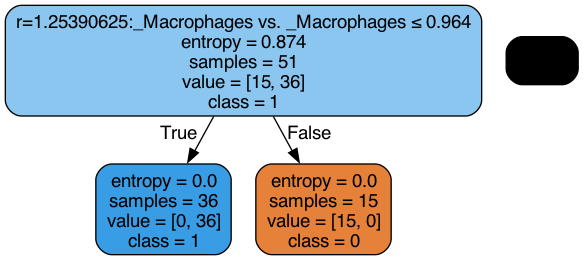

In [28]:
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_names,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('result.png')
Image(graph.create_png())

In [29]:
r = pd.read_csv("r.csv", usecols=["r"])
data = pd.DataFrame()
for i in range (total_AML):
    isoResult = pd.read_csv("./result3/AML/image_%d/iso.csv"%i).drop(["Unnamed: 0"], axis=1)
    isoResult = pd.concat([r, isoResult], axis = 1)
    isoResult["aml"] = [1] * len(r)
    data = pd.concat([data, isoResult], ignore_index = True)
for i in range (total_Normal):
    isoResult = pd.read_csv("./result3/Normal/image_%d/iso.csv"%i).drop(["Unnamed: 0"], axis=1)
    isoResult = pd.concat([r, isoResult], axis = 1)
    isoResult["aml"] = [0] * len(r)
    data = pd.concat([data, isoResult], ignore_index = True)
data


r  Intensity__Adipocytes vs. Intensity__Adipocytes  \
0       -0.313477                                         1.000000   
1        0.000000                                         1.000000   
2        0.313477                                         1.000000   
3        0.626953                                         1.000000   
4        0.940430                                         1.000000   
...           ...                                              ...   
26158  158.932617                                         1.468327   
26159  159.246094                                         1.446969   
26160  159.559570                                         1.384450   
26161  159.873047                                         1.290327   
26162  160.186523                                         1.175427   

       Intensity__Adipocytes vs. Intensity__Bcells  \
0                                         1.000000   
1                                         1.000000   
2                                         1.000000   
3                                         1.000000   
4                                         1.000000   
...                                            ...   
26158                                     1.447670   
26159                                     1.515860   
26160                                     1.589846   
26161                                     1.668550   
26162                                     1.751419   

       Intensity__Adipocytes vs. Intensity__CD34  \
0                                       1.000000   
1                                       1.000000   
2                                       1.000000   
3                                       1.000000   
4                                       1.000000   
...                                          ...   
26158                                   0.650366   
26159                                   0.661762   
26160                                   0.678522   
26161                                   0.699738   
26162                                   0.724492   

       Intensity__Adipocytes vs. Intensity__Erythroids  \
0                                             1.000000   
1                                             1.000000   
2                                             1.000000   
3                                             1.000000   
4                                             1.000000   
...                                                ...   
26158                                         0.410333   
26159                                         0.456955   
26160                                         0.507622   
26161                                         0.559543   
26162                                         0.611135   

       Intensity__Adipocytes vs. Intensity__Ki67  \
0                                       1.000000   
1                                       1.000000   
2                                       1.000000   
3                                       1.000000   
4                                       1.000000   
...                                          ...   
26158                                   0.671292   
26159                                   0.679641   
26160                                   0.688510   
26161                                   0.697145   
26162                                   0.704998   

       Intensity__Adipocytes vs. Intensity__MSC  \
0                                      1.000000   
1                                      1.000000   
2                                      1.000000   
3                                      1.000000   
4                                      1.000000   
...                                         ...   
26158                                  0.641547   
26159                                  0.652205   
26160                                  0.661624   
26161                                  0.668699   
26162             

In [30]:
x_data = data.drop(["aml"], axis=1)
X = x_data.values
y = data["aml"].values

In [31]:
from bayes_opt import BayesianOptimization
# Gradient Boosting Machine
def cart_bo(max_depth, max_features):
    params_cart = {}
    params_cart['max_depth'] = round(max_depth)
    params_cart['max_features'] = max_features
    score = cross_validate(estimator=DecisionTreeClassifier(random_state=123, **params_cart, criterion="entropy"),
                             X = X, y = y, scoring=['accuracy'], cv=3, return_train_score=False)["test_accuracy"].mean()
    return score
# Run Bayesian Optimization
params_cart ={
    'max_depth':(3, 10),
    'max_features':(0.6, 1)
}
bo_result = BayesianOptimization(cart_bo, params_cart, random_state=111)
bo_result.maximize(init_points=100, n_iter=30)

|   iter    |  target   | max_depth | max_fe... |
-------------------------------------------------
| 1         | 0.7428    | 7.285     | 0.6676    |
| 2         | 0.6966    | 6.052     | 0.9077    |
| 3         | 0.7459    | 5.067     | 0.6597    |
| 4         | 0.6599    | 3.157     | 0.7681    |
| 5         | 0.6643    | 4.671     | 0.7351    |
| 6         | 0.7425    | 9.935     | 0.6951    |
| 7         | 0.6398    | 3.568     | 0.8678    |
| 8         | 0.7425    | 7.349     | 0.7097    |
| 9         | 0.7387    | 6.264     | 0.6473    |
| 10        | 0.6435    | 3.518     | 0.9603    |
| 11        | 0.6981    | 8.558     | 0.9362    |
| 12        | 0.6827    | 8.706     | 0.9964    |
| 13        | 0.7285    | 7.041     | 0.9255    |
| 14        | 0.7905    | 5.949     | 0.611     |
| 15        | 0.7387    | 6.179     | 0.6421    |
| 16        | 0.749     | 8.721     | 0.8791    |
| 17        | 0.7425    | 6.957     | 0.7097    |
| 18        | 0.7827    | 9.989     | 0.6552    |


In [32]:
params_tuned = bo_result.max['params']
params_tuned["max_depth"] = round(params_tuned["max_depth"])
params_tuned

{'max_depth': 6, 'max_features': 0.6109791839252615}

In [55]:
decision_tree_model = DecisionTreeClassifier(criterion="entropy", max_depth=6, max_features=0.6109791839252615,
                                     random_state=123)
clf = decision_tree_model.fit(X, y)

In [77]:
feature_names = [(str(antibody_cell[i.split(" vs. ")[0]]) + " vs. " + (antibody_cell[i.split(" vs. ")[1]])) for i in x_data.columns.drop("r")]
feature_names.insert(0, "r")
importance = clf.feature_importances_
importance = pd.Series(importance, index=feature_names)
importance.sort_values(ascending=False).to_csv("importance.csv")
#ToDo: direction for the comparison (greater or smaller)

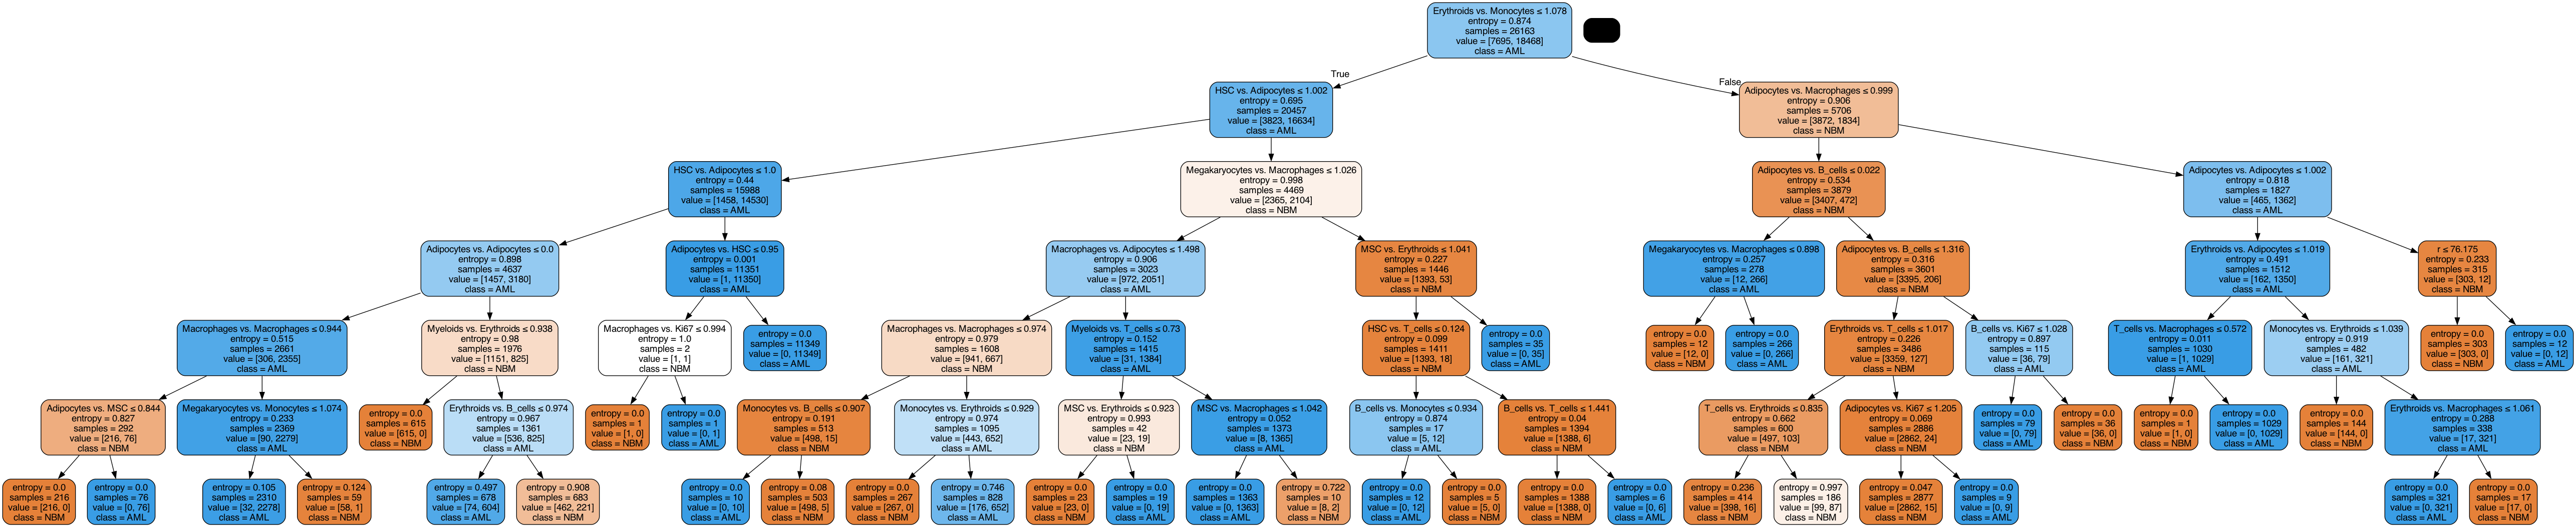

In [79]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_names,class_names=['NBM','AML'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('result.png')
Image(graph.create_png())

In [80]:
import dtreeviz

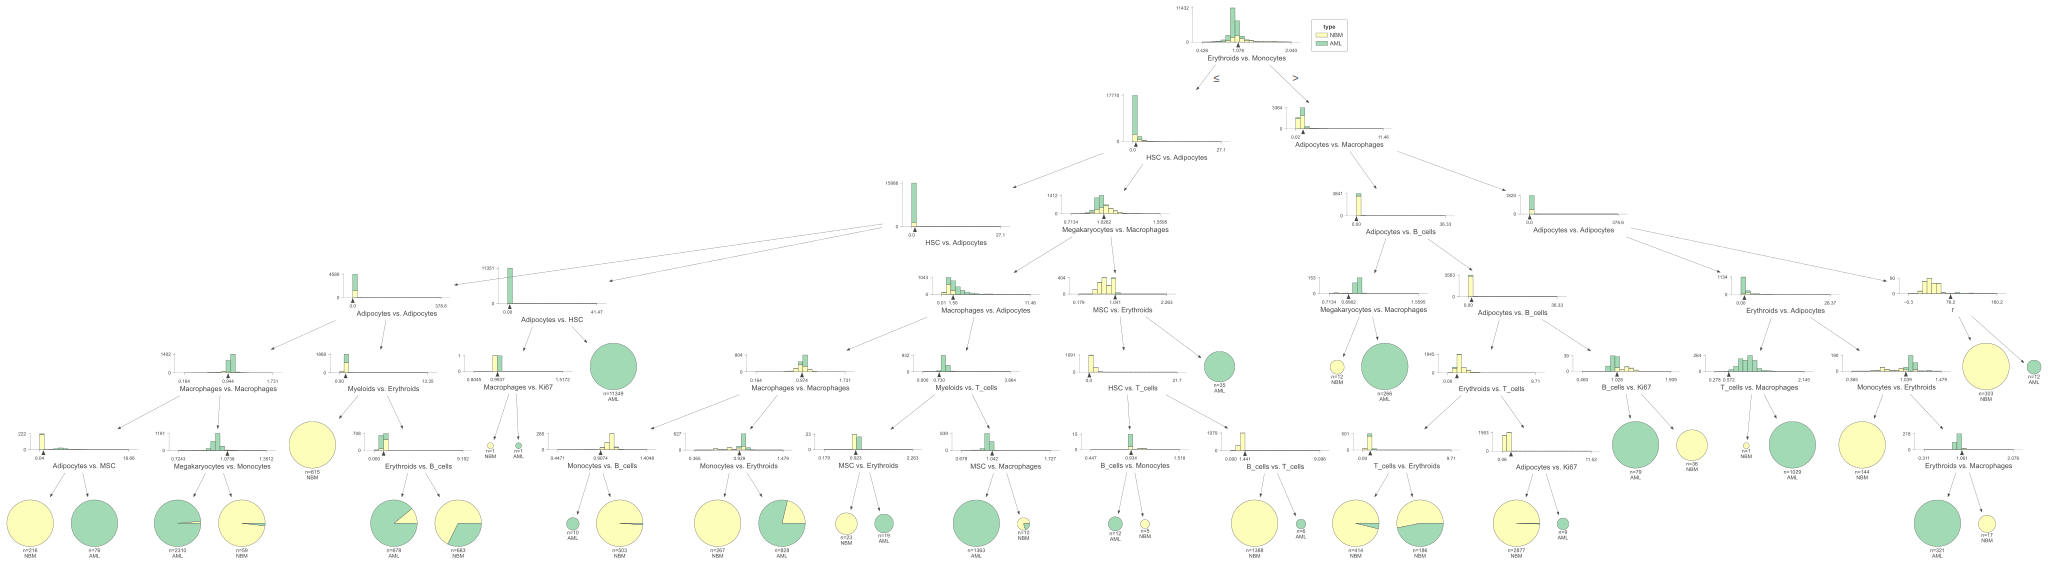

In [81]:
viz = dtreeviz.model(clf, X, y, target_name="type",
                feature_names=feature_names,
                class_names=['NBM','AML'])
viz.view(scale = 0.8)


In [38]:
node_by_image_full = pd.DataFrame()
for i in range(51):
    node_by_image_full[i] = clf.apply(X[i * 513: i * 513 + 513])
node_by_image = node_by_image_full.melt(var_name="image_num", value_name="leaf_num")
p1 = alt.Chart(node_by_image).mark_bar().encode(
    x="leaf_num:N",
    y="count()",
    color=alt.Color("image_num:N", legend=alt.Legend(columns=2, symbolLimit=0))
)
p2 = alt.Chart(node_by_image).mark_bar().encode(
    y="image_num:N",
    x="count()",
    color=alt.Color("leaf_num:N", legend=alt.Legend(columns=2, symbolLimit=0))
)
alt.hconcat(p1, p2).resolve_legend(color="independent").resolve_scale(color="independent")

alt.HConcatChart(...)

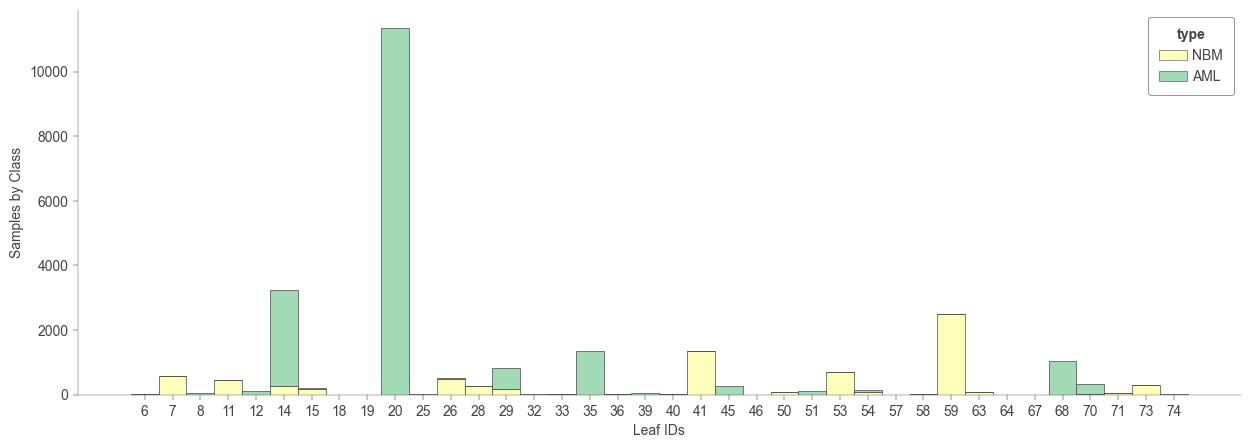

In [39]:
viz.ctree_leaf_distributions(figsize=(15, 5))

In [40]:
viz.node_stats(node_id=41)

r  Intensity__Adipocytes vs. Intensity__Adipocytes  \
count     1360.0                                           1360.0   
mean   27.401309                                         1.718379   
std    22.204508                                         1.319715   
min    -0.313477                                         0.000003   
25%     9.325928                                         1.047661   
50%    21.943359                                         1.387486   
75%    42.005859                                          1.93226   
max    119.43457                                        12.290644   

       Intensity__Adipocytes vs. Intensity__Bcells  \
count                                       1360.0   
mean                                      1.392856   
std                                       0.611863   
min                                       0.264968   
25%                                       1.044473   
50%                                       1.313005   
75%                                       1.595094   
max                                       7.796327   

       Intensity__Adipocytes vs. Intensity__CD34  \
count                                     1360.0   
mean                                    1.735766   
std                                     0.964065   
min                                     0.628522   
25%                                     1.211423   
50%                                     1.389678   
75%                                     1.931328   
max                                    11.949237   

       Intensity__Adipocytes vs. Intensity__Erythroids  \
count                                           1360.0   
mean                                          1.152223   
std                                           0.388123   
min                                           0.453275   
25%                                           0.930357   
50%                                           1.080663   
75%                                           1.325915   
max                                           5.025288   

       Intensity__Adipocytes vs. Intensity__Ki67  \
count                                     1360.0   
mean                                    1.412337   
std                                     0.539431   
min                                     0.463928   
25%                                     1.174084   
50%                                     1.293967   
75%                                     1.521722   
max                                     7.419954   

       Intensity__Adipocytes vs. Intensity__MSC  \
count                                    1360.0   
mean                                   1.424009   
std                                    0.686766   
min                                    0.524777   
25%                                    1.153455   
50%                                    1.306586   
75%                                    1.496408   
max                                     9.41657   

       Intensity__Adipocytes vs. Intensity__Macrophages  \
count                                            1360.0   
mean                                            1.52458   
std                                            0.872566   
min                                            0.382334   
25%                                            1.172486   
50%                                            1.314077   
75%                                            1.588424   
max                                           11.457473   

       Intensity__Adipocytes vs. Intensity__Megs  \
count                                     1360.0   
mean                                    1.459373   
std                                     0.591706   
min                                     0.583881   
25%                                     1.195562   
50%                                     1.360817   
75%                                     1.591846   
max                                  

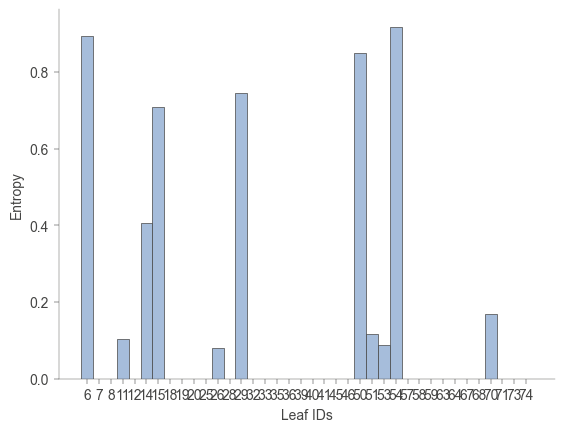

In [41]:
viz.leaf_purity()

In [ ]:
leaf_image_count = pd.DataFrame()
for i in range(51):
    leaf_image_count[i] = 

In [ ]:
leaf_image_count = node_by_image.groupby(["image_num", "leaf_num"]).count()
leaf_image_count.pivot(index="leaf_num", columns="image_num")


In [ ]:
clf.predict(X[: 512])
for i in range(51):
    pred = clf.predict(X[i * 513: i * 513 + 512])
    lab = y[i * 513]
    acc = np.where(pred == lab, 1, 0).sum()/513
    print("accuracy for image %d is %f"%(i, acc))

In [54]:
image_to_imageNum = pd.read_csv("../data/output/AML/Bcells/Image.csv")[["FileName_Original"]]
aml_imageNum = []
for i in range(len(image_to_imageNum)):
    aml_imageNum.append(image_to_imageNum.iloc[i, 0].split("_")[0])

image_to_imageNum = pd.read_csv("../data/output/Normal/Bcells/Image.csv")[["FileName_Original"]]
nbm_imageNum = []
for i in range(len(image_to_imageNum)):
    nbm_imageNum.append(image_to_imageNum.iloc[i, 0].split("_")[0])
print(np.unique(aml_imageNum))


['10782' '12681' '13014' '13170' '2846' '2931' '5404' '6250' '644' '8354'
 '8907' '9552']


In [119]:
clinical = pd.read_csv("../data/AML clinical data/Sheet1-Table 1.csv", usecols=["Biopsy Number", "MSC density", "RELAPSE", "OVERALL.SURVIVAL", "TTR", "status.at.last.follow.up"])
biop = [num.split("-")[1] for num in clinical["Biopsy Number"]]
clinical["Biopsy Number"] = biop
clinical



Biopsy Number MSC density RELAPSE status.at.last.follow.up  \
0           8354         Low      no                    alive   
1           8907      Normal      no                     dead   
2          12681         Low     NaN                     dead   
3           2846      Normal     yes                     dead   
4          10782      Normal     yes                     dead   
5          13014         Low      no                    alive   
6           2931      Normal     yes                     dead   
7          13170      Normal     NaN                     dead   
8           9552        High     yes                     dead   
9           0644      Normal     No                      dead   
10          6250         Low     Yes                    alive   
11          5404         Low      No                    alive   

    OVERALL.SURVIVAL     TTR  
0             1777.0  1737.0  
1              394.0   339.0  
2                7.0     NaN  
3              290.0   119.0  
4              232.0    72.0  
5             1309.0  1236.0  
6              322.0   173.0  
7              113.0     NaN  
8              341.0     NaN  
9                NaN     NaN  
10               NaN     NaN  
11               NaN     NaN

In [118]:
r = pd.read_csv("r.csv", usecols=["r"])
survival_data = pd.DataFrame()
for i in range (total_AML):
    isoResult = pd.read_csv("./result3/AML/image_%d/iso.csv"%i).drop(["Unnamed: 0"], axis=1)
    isoResult = pd.concat([r, isoResult], axis = 1)
    isoResult["aml"] = [1] * len(r)
    clinical_cols = clinical.loc[clinical["Biopsy Number"] == aml_imageNum[i]]
    isoResult = isoResult.join(clinical_cols, how="cross")
    survival_data = pd.concat([survival_data, isoResult], ignore_index = True)
for i in range (total_Normal):
    isoResult = pd.read_csv("./result3/Normal/image_%d/iso.csv"%i).drop(["Unnamed: 0"], axis=1)
    isoResult = pd.concat([r, isoResult], axis = 1)
    isoResult["aml"] = [0] * len(r)
    survival_data = pd.concat([survival_data, isoResult], ignore_index = True)
survival_data


r  Intensity__Adipocytes vs. Intensity__Adipocytes  \
0       -0.313477                                         1.000000   
1        0.000000                                         1.000000   
2        0.313477                                         1.000000   
3        0.626953                                         1.000000   
4        0.940430                                         1.000000   
...           ...                                              ...   
24619  158.932617                                         1.468327   
24620  159.246094                                         1.446969   
24621  159.559570                                         1.384450   
24622  159.873047                                         1.290327   
24623  160.186523                                         1.175427   

       Intensity__Adipocytes vs. Intensity__Bcells  \
0                                         1.000000   
1                                         1.000000   
2                                         1.000000   
3                                         1.000000   
4                                         1.000000   
...                                            ...   
24619                                     1.447670   
24620                                     1.515860   
24621                                     1.589846   
24622                                     1.668550   
24623                                     1.751419   

       Intensity__Adipocytes vs. Intensity__CD34  \
0                                       1.000000   
1                                       1.000000   
2                                       1.000000   
3                                       1.000000   
4                                       1.000000   
...                                          ...   
24619                                   0.650366   
24620                                   0.661762   
24621                                   0.678522   
24622                                   0.699738   
24623                                   0.724492   

       Intensity__Adipocytes vs. Intensity__Erythroids  \
0                                             1.000000   
1                                             1.000000   
2                                             1.000000   
3                                             1.000000   
4                                             1.000000   
...                                                ...   
24619                                         0.410333   
24620                                         0.456955   
24621                                         0.507622   
24622                                         0.559543   
24623                                         0.611135   

       Intensity__Adipocytes vs. Intensity__Ki67  \
0                                       1.000000   
1                                       1.000000   
2                                       1.000000   
3                                       1.000000   
4                                       1.000000   
...                                          ...   
24619                                   0.671292   
24620                                   0.679641   
24621                                   0.688510   
24622                                   0.697145   
24623                                   0.704998   

       Intensity__Adipocytes vs. Intensity__MSC  \
0                                      1.000000   
1                                      1.000000   
2                                      1.000000   
3                                      1.000000   
4                                      1.000000   
...                                         ...   
24619                                  0.641547   
24620                                  0.652205   
24621                                  0.661624   
24622                                  0.668699   
24623             